#### Importación de librerias

In [62]:
import biosignalsnotebooks as bsnb
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pywt

from numpy import array, mean, average, std, sum, sqrt, where, argmax
from numpy.random import normal
from scipy.signal import iirnotch, lfilter


#### Importación de las señales

In [63]:
BicepDer_FaseInicial = np.genfromtxt("../sEMG_Signals/BicepDerecho_FaseInicial.txt",  delimiter="\t",skip_header = 3)
BicepDer_FaseFinal = np.genfromtxt("../sEMG_Signals/BicepDerecho_FaseFinal.txt",  delimiter="\t",skip_header = 3)
Fs = 1000
Ts = 1/Fs
BicepDer_FaseInicial = BicepDer_FaseInicial[:,5]
BicepDer_FaseFinal = BicepDer_FaseFinal[:,5]
Time1 = bsnb.generate_time(BicepDer_FaseInicial, Fs)
Time2 = bsnb.generate_time(BicepDer_FaseFinal, Fs)

In [64]:
# Funcion de transferencia
Gemg = 1000
Vcc = 3
n = 10

BicepDer_FaseInicial = (((BicepDer_FaseInicial/2**n)-(1/2))*Vcc)/Gemg
BicepDer_FaseInicial = BicepDer_FaseInicial * 1000

BicepDer_FaseFinal = (((BicepDer_FaseFinal/2**n)-(1/2))*Vcc)/Gemg
BicepDer_FaseFinal = BicepDer_FaseFinal * 1000

#### Señal incial

##### Visualización

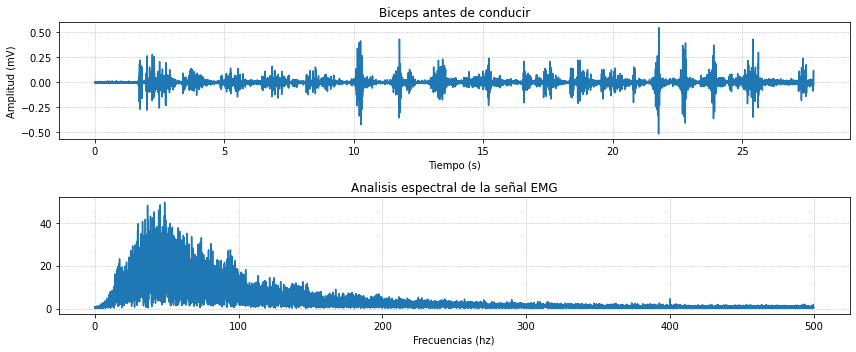

In [65]:
#Transformada de Fourier
freq_axis_1, power_spect_1 = bsnb.plotfft(BicepDer_FaseInicial, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time1,BicepDer_FaseInicial)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Biceps antes de conducir")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_1, power_spect_1)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Filtrado

In [66]:
BicepDer_FaseInicialFilter = bsnb.bandpass(BicepDer_FaseInicial, f1=50,f2=350, order=8, fs=Fs)

# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
BicepDer_FaseInicialFilter = lfilter(b, a, BicepDer_FaseInicialFilter)
BicepDer_FaseInicialFilter = lfilter(b, a, BicepDer_FaseInicialFilter)

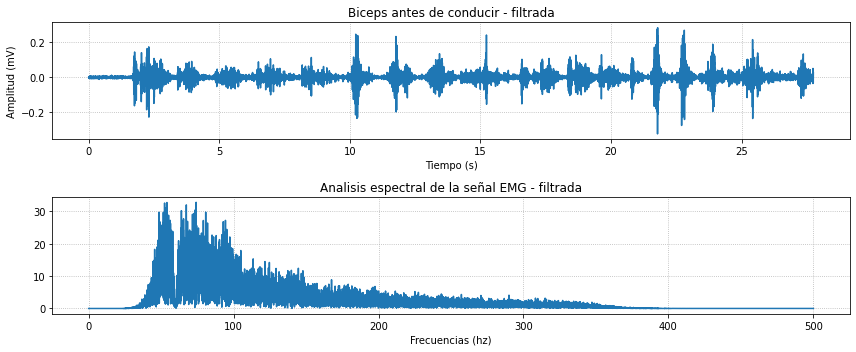

In [67]:
#Transformada de Fourier
freq_axis_2, power_spect_2 = bsnb.plotfft(BicepDer_FaseInicialFilter, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time1,BicepDer_FaseInicialFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Biceps antes de conducir - filtrada")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG - filtrada")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_2, power_spect_2)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

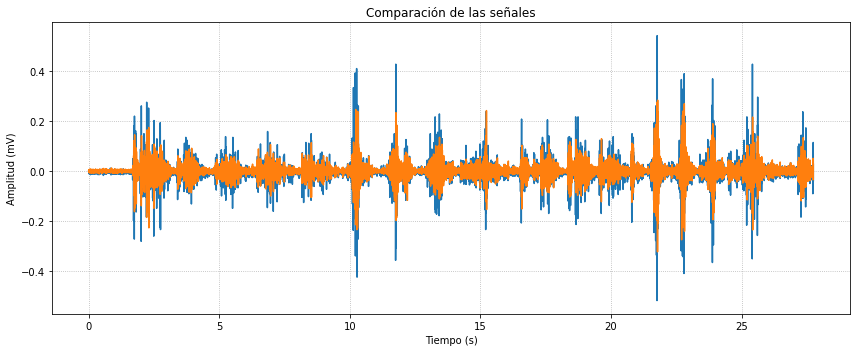

In [68]:
plt.figure(figsize=(12,5))
plt.plot(Time1, BicepDer_FaseInicial)
plt.plot(Time1, BicepDer_FaseInicialFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Comparación de las señales")
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Características

In [69]:
Caracteristicas_Inicial = {}
# MNF = []
# for i in range(len(freq_axis_2)) :
#     power_spect_2[i] = power_spect_2[i]**2
#     aux = sum(freq_axis_2[i] * power_spect_2[i]) / sum(power_spect_2)
#     MNF.append(aux)
# mnfValue = mean(MNF)
Caracteristicas_Inicial = bsnb.emg_parameters(BicepDer_FaseInicialFilter, Fs, raw_to_mv=False)
# Caracteristicas_Inicial['MNF'] = mnfValue
print(Caracteristicas_Inicial)

{'Number of Muscular Activations': 19, 'Maximum Muscular Activation Duration': 1.3660492269991709, 'Minimum Muscular Activation Duration': 0.09400338750945991, 'Average Muscular Activation Duration': 0.5828104758635204, 'Standard Deviation of Muscular Activation Duration': 0.25853236420652254, 'Maximum Sample Value': 0.2837709696239573, 'Minimum Sample Value': -0.32355638522897046, 'Average Sample Value': -6.342013963865171e-08, 'Standard Deviation Sample Value': 0.028145675275791135, 'RMS': 0.028145675275862585, 'Area': -0.01505048733233175, 'Total Power Spect': 0.0006603920074096623, 'Median Frequency': 78.125, 'Maximum Power Frequency': 50.78125}


##### Señal después de conducir

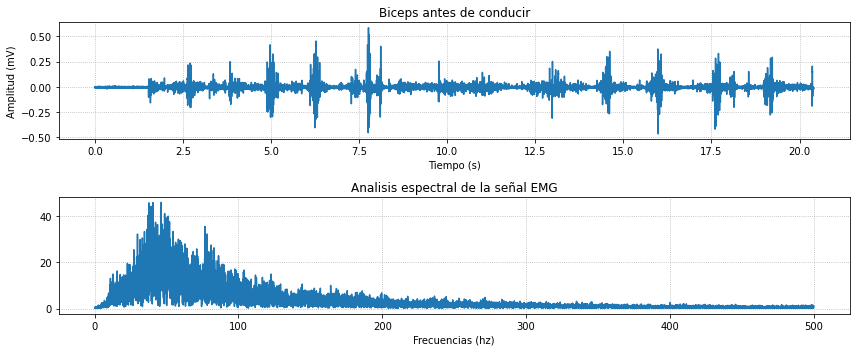

In [70]:
#Transformada de Fourier
freq_axis_3, power_spect_3 = bsnb.plotfft(BicepDer_FaseFinal, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,BicepDer_FaseFinal)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Biceps antes de conducir")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_3, power_spect_3)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Filtrado

In [71]:
BicepDer_FaseFinalFilter = bsnb.bandpass(BicepDer_FaseFinal, f1=50,f2=350, order=8, fs=Fs)

# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
BicepDer_FaseFinalFilter = lfilter(b, a, BicepDer_FaseFinalFilter)
BicepDer_FaseFinalFilter = lfilter(b, a, BicepDer_FaseFinalFilter)

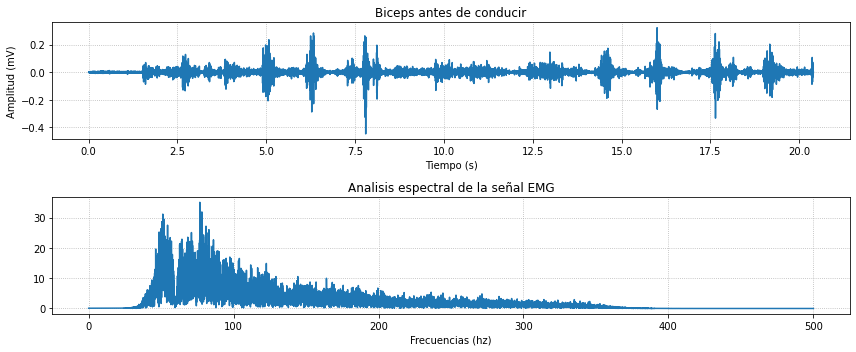

In [72]:
#Transformada de Fourier
freq_axis_4, power_spect_4 = bsnb.plotfft(BicepDer_FaseFinalFilter, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(Time2,BicepDer_FaseFinalFilter)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Biceps antes de conducir")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EMG")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_4, power_spect_4)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EMGyFFT_crudo.png', transparent=False, )
plt.show()

##### Características

In [78]:
import json


Caracteristicas_Final = {}
Caracteristicas_Final = bsnb.emg_parameters(BicepDer_FaseFinal, Fs, raw_to_mv=False)
#print(Caracteristicas_Final)

comparison_car = {}
comparison_car["Caracteristicas_Inicial"] = Caracteristicas_Inicial 
comparison_car["Caracteristicas_Final"] = Caracteristicas_Final
print(json.dumps(comparison_car, indent=4))

{
    "Caracteristicas_Inicial": {
        "Number of Muscular Activations": 19,
        "Maximum Muscular Activation Duration": 1.3660492269991709,
        "Minimum Muscular Activation Duration": 0.09400338750945991,
        "Average Muscular Activation Duration": 0.5828104758635204,
        "Standard Deviation of Muscular Activation Duration": 0.25853236420652254,
        "Maximum Sample Value": 0.2837709696239573,
        "Minimum Sample Value": -0.32355638522897046,
        "Average Sample Value": -6.342013963865171e-08,
        "Standard Deviation Sample Value": 0.028145675275791135,
        "RMS": 0.028145675275862585,
        "Area": -0.01505048733233175,
        "Total Power Spect": 0.0006603920074096623,
        "Median Frequency": 78.125,
        "Maximum Power Frequency": 50.78125
    },
    "Caracteristicas_Final": {
        "Number of Muscular Activations": 12,
        "Maximum Muscular Activation Duration": 1.073052600617678,
        "Minimum Muscular Activation Duration"